In [43]:
import pandas as pd 
import numpy as np  
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.subplots as sp
import plotly.graph_objs as go 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Importing dataset
df=pd.read_csv('Dataset-Mental-Disorders.csv',index_col='Patient Number')
df.head(2)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression


In [45]:
#summery of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, Patiant-01 to Patiant-120
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 

In [46]:
# df.drop(columns=['Sexual Activity'], inplace=True)

In [47]:
# unique values in each columns
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing: ['YES' 'NO']
Suicidal thoughts: ['YES ' 'YES' 'NO']
Anorxia: ['NO' 'YES']
Authority Respect: ['NO' 'YES']
Try-Explanation: ['YES' 'NO']
Aggressive Response: ['NO' 'YES']
Ignore & Move-On: ['NO' 'YES']
Nervous Break-down: ['YES' 'NO']
Admit Mistakes: ['YES' 'NO']
Overthinking: ['YES' 'NO']
Sexual Activity: ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']
Concentration: ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']
Optimisim: ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']
Expert Diagnose: ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


In [48]:
# merging same values in 'Suicidal thoughts' column
df.loc[df[df['Suicidal thoughts']=='YES ']['Suicidal thoughts'].index[0],'Suicidal thoughts']='YES'

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_5584\1254054704.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


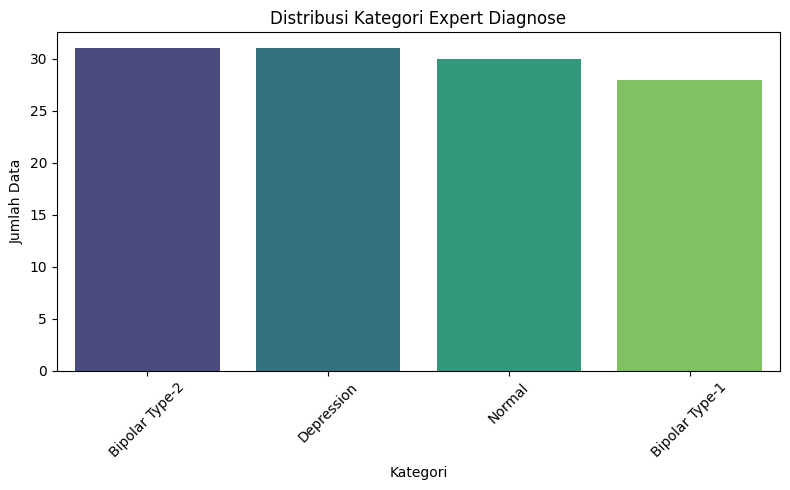

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misal df adalah DataFrame kamu
plt.figure(figsize=(8,5))

# Hitung frekuensi tiap kategori
counts = df['Expert Diagnose'].value_counts()

# Barplot
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

plt.title('Distribusi Kategori Expert Diagnose')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
# We have catogorical features, so we need to encode them

from sklearn.preprocessing import LabelEncoder
encoders={} 
for i in df.columns[:-1]:
    encoders[i]=LabelEncoder() 
    encoders[i].fit(df[i])
    df[i]=encoders[i].transform(df[i])

In [51]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,Bipolar Type-2
Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,Depression
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,Bipolar Type-1
Patiant-04,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,Bipolar Type-2
Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,Depression
Patiant-117,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,Bipolar Type-1
Patiant-118,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,Bipolar Type-2


In [52]:
# Encode label
le = LabelEncoder()
df['Expert Diagnose'] = le.fit_transform(df['Expert Diagnose'])

# Pisahkan fitur dan label
X = df.drop('Expert Diagnose', axis=1)
y = df['Expert Diagnose']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Tampilkan importance
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                Feature  Importance
4            Mood Swing    0.243518
16            Optimisim    0.141883
14      Sexual Activity    0.129742
0               Sadness    0.062193
5     Suicidal thoughts    0.056300
1              Euphoric    0.052288
15        Concentration    0.048809
2             Exhausted    0.041436
3       Sleep dissorder    0.036982
9   Aggressive Response    0.034884
7     Authority Respect    0.030887
11   Nervous Break-down    0.027703
13         Overthinking    0.024740
10     Ignore & Move-On    0.022804
6               Anorxia    0.019088
12       Admit Mistakes    0.014524
8       Try-Explanation    0.012219


In [53]:
# import seaborn as sns
# columns = [
#     "Sadness", "Euphoric", "Exhausted", "Sleep dissorder", "Mood Swing",
#     "Suicidal thoughts", "Anorxia", "Authority Respect", "Try-Explanation",
#     "Aggressive Response", "Ignore & Move-On", "Nervous Break-down",
#     "Admit Mistakes", "Overthinking", "Concentration", "Sexual Activity", "Optimisim"
# ]

# df_selected = df[columns]

# # Hitung korelasi antar kolom
# corr = df_selected.corr()

# # Buat heatmap
# plt.figure(figsize=(14, 10))
# sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
# plt.title("Korelasi Antar Gejala Psikologis")
# plt.tight_layout()
# plt.show()

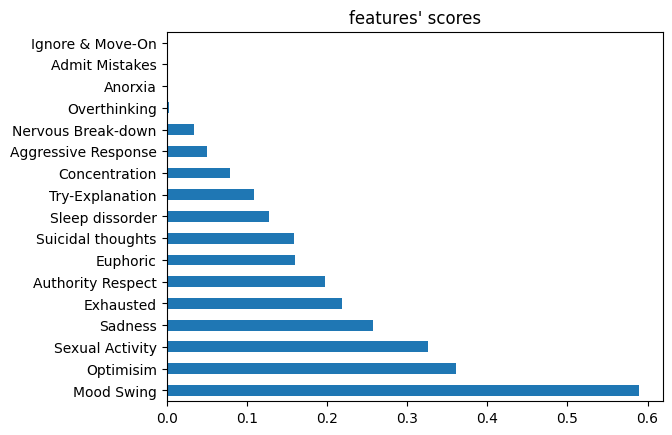

Sadness                0.257284
Euphoric               0.159931
Exhausted              0.219045
Sleep dissorder        0.127886
Mood Swing             0.589290
Suicidal thoughts      0.159436
Anorxia                0.000000
Authority Respect      0.197063
Try-Explanation        0.109300
Aggressive Response    0.050134
Ignore & Move-On       0.000000
Nervous Break-down     0.033773
Admit Mistakes         0.000000
Overthinking           0.002604
Sexual Activity        0.326618
Concentration          0.079577
Optimisim              0.361017
dtype: float64


In [54]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import pandas as pd

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

mi_scores = mutual_info_classif(X, y, random_state=42)

feature_selection = SelectKBest(score_func=lambda X, y: mi_scores)
feature_selection.fit(X, y)

features_scores = pd.Series(mi_scores, index=X.columns)
features_scores.nlargest(18).plot(kind='barh', title="features' scores")
plt.show()

print(features_scores)


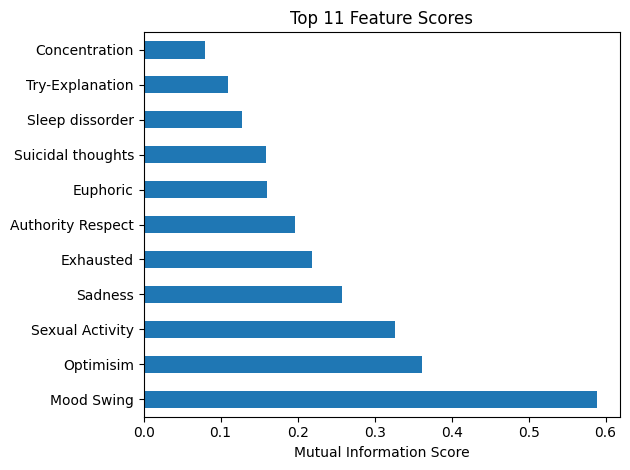

Top 11 features:
 Mood Swing           0.589290
Optimisim            0.361017
Sexual Activity      0.326618
Sadness              0.257284
Exhausted            0.219045
Authority Respect    0.197063
Euphoric             0.159931
Suicidal thoughts    0.159436
Sleep dissorder      0.127886
Try-Explanation      0.109300
Concentration        0.079577
dtype: float64


In [55]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya df sudah terdefinisi sebelumnya
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Hitung mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Buat Series dari skor dan ambil 11 terbesar
features_scores = pd.Series(mi_scores, index=X.columns)
top_11_features = features_scores.nlargest(11)

# Visualisasi
top_11_features.plot(kind='barh', title="Top 11 Feature Scores")
plt.xlabel("Mutual Information Score")
plt.tight_layout()
plt.show()

# Cetak nama fitur terbaik
print("Top 11 features:\n", top_11_features)

# Ambil data dengan 11 fitur terbaik
X_top11 = X[top_11_features.index]


In [56]:
# df.drop(columns=['Anorxia', 'Admit Mistakes', 'Ignore & Move-On'], inplace=True)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

# === 1. Fitur Seleksi: Mutual Information (ambil 11 fitur) ===
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
mi_scores = mutual_info_classif(X, y, random_state=42)
features_scores = pd.Series(mi_scores, index=X.columns)
top_11_features = features_scores.nlargest(11)
X_selected = X[top_11_features.index]

# === 2. Split data ===
x_train, x_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, stratify=y, shuffle=True, random_state=42
)

In [58]:
# X = df.drop(columns=[df.columns[-1]])  # semua fitur kecuali target
# y = df[df.columns[-1]]                  # target

# x_train, x_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.3,
#     random_state=2,
#     shuffle=True,
#     stratify=y  # optional, kalau mau jaga proporsi kelas
# )


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# === 1. Fitur Seleksi: Mutual Information (ambil 11 fitur) ===
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
mi_scores = mutual_info_classif(X, y, random_state=42)
features_scores = pd.Series(mi_scores, index=X.columns)
top_11_features = features_scores.nlargest(11)
X_selected = X[top_11_features.index]

# === 2. Split data ===
x_train, x_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, stratify=y, shuffle=True, random_state=42
)

# === 3. Definisikan pipeline Logistic Regression dengan scaler ===
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

# === 4. Grid search parameter untuk Logistic Regression ===
param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 100],  # Regularisasi
    'lr__solver': ['liblinear', 'lbfgs'],
    'lr__penalty': ['l2']  # hanya l2 untuk lbfgs dan liblinear
}

grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr.fit(x_train, y_train)
print(f"Best params Logistic Regression: {grid_lr.best_params_}")

# === 5. Grid search parameter untuk Random Forest ===
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(x_train, y_train)
print(f"Best params Random Forest: {grid_rf.best_params_}")

# === 6. Ambil model terbaik dari masing-masing grid search ===
best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_

# === 7. Gabungkan kedua model dengan VotingClassifier ===
voting_clf = VotingClassifier(
    estimators=[('rf', best_rf), ('lr', best_lr)],
    voting='soft',
    n_jobs=-1
)

voting_clf.fit(x_train, y_train)

# === 8. Evaluasi model gabungan ===
y_pred = voting_clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params Logistic Regression: {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Fitting 3 folds for each of 216 candidates, totalling 648 fits


d:\DBS\Project Capstone\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
171 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DBS\Project Capstone\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DBS\Project Capstone\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\DBS\Project Capstone\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "d:\DBS\Project Capst

Best params Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Accuracy: 0.8055555555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.82      1.00      0.90         9
           2       0.67      0.89      0.76         9
           3       0.83      0.56      0.67         9

    accuracy                           0.81        36
   macro avg       0.83      0.81      0.80        36
weighted avg       0.83      0.81      0.80        36



In [60]:
# best parameters for model
grid_search.best_params_

NameError: name 'grid_search' is not defined

In [ ]:
y_predict=grid_search.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.80      0.89      0.84         9
           2       0.82      1.00      0.90         9
           3       0.86      0.67      0.75         9

    accuracy                           0.83        36
   macro avg       0.84      0.83      0.83        36
weighted avg       0.84      0.83      0.83        36



In [ ]:
# Buat DataFrame baru dengan hanya 11 fitur terbaik + labelnya
df_selected = df[top_11_features.index.tolist() + [df.columns[-1]]]

# Tampilkan 5 baris pertama untuk verifikasi
print(df_selected.head())


                Mood Swing  Optimisim  Sexual Activity  Sadness  Exhausted  \
Patient Number                                                               
Patiant-01               1          3                2        3          2   
Patiant-02               0          4                3        3          3   
Patiant-03               1          6                5        2          2   
Patiant-04               1          1                2        3          3   
Patiant-05               0          5                4        3          2   

                Authority Respect  Euphoric  Suicidal thoughts  \
Patient Number                                                   
Patiant-01                      0         1                  1   
Patiant-02                      0         1                  1   
Patiant-03                      0         0                  0   
Patiant-04                      0         1                  1   
Patiant-05                      0         3              

In [ ]:
df_selected

,Mood Swing,Optimisim,Sexual Activity,Sadness,Exhausted,Authority Respect,Euphoric,Suicidal thoughts,Sleep dissorder,Try-Explanation,Concentration,Expert Diagnose
Patient Number,,,,,,,,,,,,
Patiant-01,1,3,2,3,2,0,1,1,2,1,2,1
Patiant-02,0,4,3,3,3,0,1,1,2,0,1,2
Patiant-03,1,6,5,2,2,0,0,0,2,1,4,0
Patiant-04,1,1,2,3,3,0,1,1,0,1,1,1
Patiant-05,0,5,4,3,2,0,3,0,2,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,2,1,0,3,0,1,1,2,1,4,2
Patiant-117,1,7,5,2,2,0,2,0,1,0,6,0
Patiant-118,1,2,0,3,3,1,2,0,2,0,4,1


In [ ]:
import joblib

# Simpan model terbaik
joblib.dump(grid_search.best_estimator_, 'best_rf_model.pkl')


['best_rf_model.pkl']